In [2]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import sin, cos, exp, pi, power
%matplotlib inline

In [3]:
l = np.array([-3,-2,-1,0,1,2,3])
m = np.ones(l.shape)
print(m)
m[l % 2 == 0] = 0
print(l)
print(m)

[1. 1. 1. 1. 1. 1. 1.]
[-3 -2 -1  0  1  2  3]
[1. 0. 1. 0. 1. 0. 1.]


In [4]:
T = 4

### Define your fourier series function here to generate a_k s

In [5]:
def a(k):
    global T
    '''
    DOCSTRING: this function will return a numpy array of ak to given ak
    k -> a numpy array containing a range of k
    '''
    a_0 = 3 # this is the DC offset value
    T = 4 # period of the signal
    
    index_0 = np.where(k == 0)[0][0] # index of the zero
    k = k[k != 0]
    
    a_1 = np.zeros(k.shape)
    a_2 = (6/(k*pi)**2) * (1-cos(k*pi))
    
    return np.insert(a_1 + a_2, index_0, a_0)

Now create range of k

In [6]:
range_ = 50
k = np.arange(-range_, range_ + 1, 1)
a_k = a(k)

Now plot a_k s

(-5.0, 5.0)

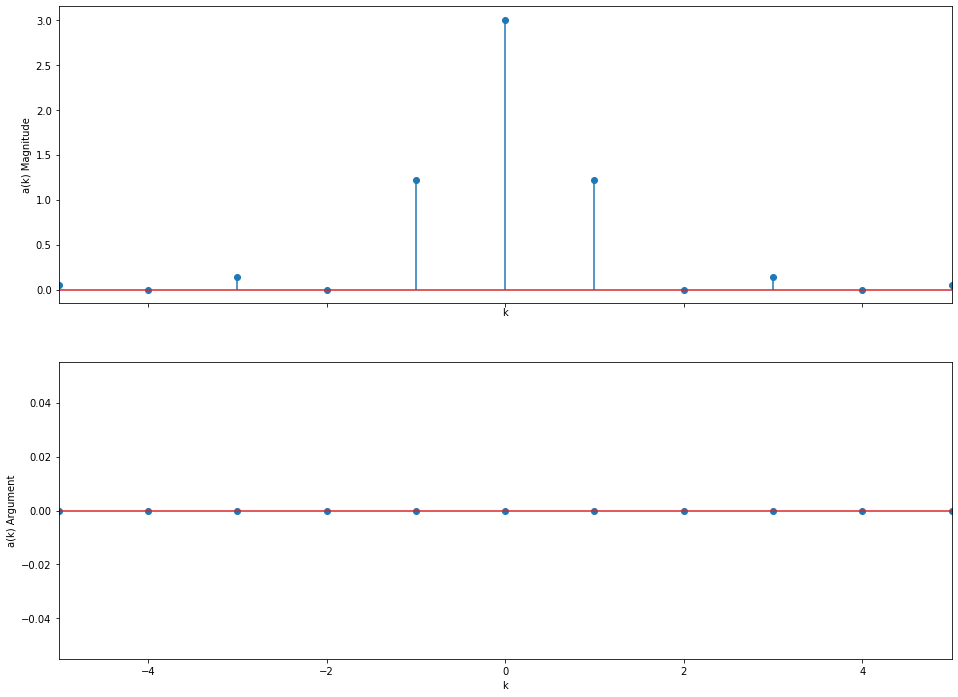

In [7]:
fig, ax = plt.subplots(2,1, figsize=(16, 12), sharex = True)

ax[0].set_xlabel("k")
ax[0].set_ylabel("a(k) Magnitude")
ax[0].stem(k, np.abs(a_k))
ax[0].set_xlim(-50, 51)

ax[1].set_xlabel("k")
ax[1].set_ylabel("a(k) Argument")
ax[1].stem(k, np.angle(a_k))
ax[1].set_xlim(-5, 5)

### Now this is where we process the time domain signal

In [8]:
t = np.linspace(-5, 5, 1000) # createing the time domain

In [9]:
signal = np.zeros(t.shape)
w0 = 2*pi / T

In [10]:
for index, ak in enumerate(a_k):
    k_ = index - np.where(k == 0)[0][0]
    signal += np.real(ak * exp(1j*k_* w0 * t))

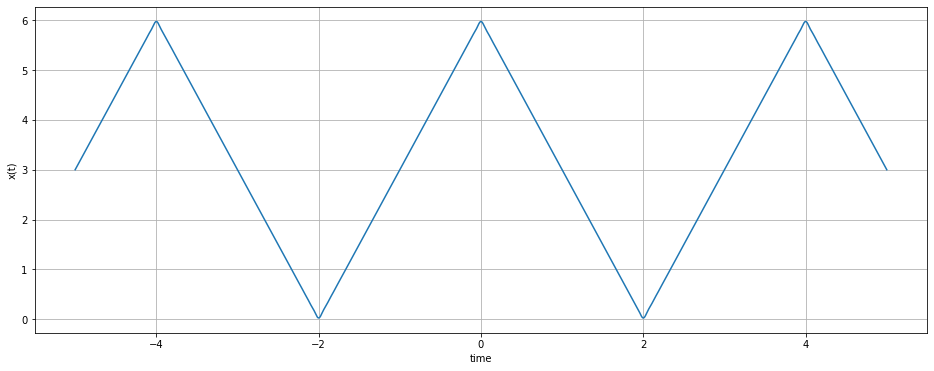

In [11]:
fig, ax = plt.subplots(1,1, figsize=(16, 6))

ax.set_xlabel("time")
ax.set_ylabel("x(t)")
ax.plot(t, signal)
ax.grid()